In [2]:
import torch, os
import numpy as np
from importlib import reload
os.chdir("/home/gibson/sdb2/cola/ass/balls/2019-hackathon-ocr-wymbah")

In [3]:
import nets.ctcnet
reload(nets.ctcnet)
from nets.ctcnet import *

import util.beam
reload(util.beam)
from util.beam import BeamSearch

from util.file import FileHolder
fh = FileHolder()

from util.chars import chars, nchars, idx

Using path ../AI4Good---Meza-OCR-Challenge


In [5]:
def to_tensor(buf):
  buf -= 0.5
  buf *= 2
  #buf -= np.mean(buf, axis=(0, 1, 2))[None, None, None, :]
  #buf /= np.std(buf, axis=(0, 1, 2))[None, None, None, :]
  #buf -= np.array([0.485, 0.456, 0.406])[None, None, None, :]
  #buf /= np.array([0.229, 0.224, 0.225])[None, None, None, :]
  return torch.tensor(buf, dtype=torch.float32).permute(0, 3, 1, 2)

def get_batch(batchsize, validation=False):
  inp, outp = fh.get_batch(batchsize, validation)
  inp = np.stack(inp)
  inp = to_tensor(inp)
  return inp, outp

ctcmodel = CTCModel().cuda()
checkpoint = torch.load("checkpoint-0040-0.56")
ctcmodel.load_state_dict(checkpoint['ctcmodel'])
ctcmodel.eval()

def getone():
    inp, outp = get_batch(1, validation=True)
    log = ctcmodel(inp)
    log = log.detach().cpu().numpy()
    return inp, outp, log

import matplotlib.pyplot as p

def show(inp):
    #print(outp[0])
    p.imshow(inp.squeeze(0).permute(1, 2, 0))
    p.show()

In [6]:
def beam(log, nbeams):
    beas = BeamSearch(nbeams)
    for j in range(log.shape[1]):
        beas.add_logit(log[0, j, :])
    return beas.topbeams()

In [10]:
def tets():
    inp, outp, log = getone()
    answer = beam(log, 8)
    if answer[0].str() != outp[0]:
        print("beams:", answer)
        print("correct:", outp)
        show(inp)
        return 0
    else:
        return 1

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


beams: [beam(97 , -0.0112), beam(99 , -4.8679), beam(87 , -6.2230), beam(7 , -6.7569), beam(27 , -9.0940), beam(91 , -9.9169), beam(9 , -10.5684), beam(970 , -11.3863)]
correct: ['88']


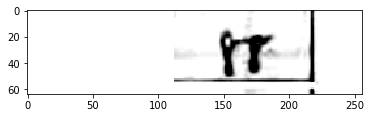

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


beams: [beam(786 , -0.0742), beam(186 , -3.9015), beam(736 , -4.0754), beam(7.86 , -5.2472), beam(796 , -5.4416), beam(7860 , -9.9848), beam(7860, -11.9135), beam(1860 , -14.5267)]
correct: ['186']


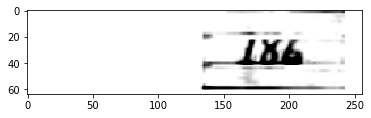

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


beams: [beam(-197 , -0.1526), beam(-194 , -2.3958), beam(-199 , -4.3678), beam(-191 , -4.4330), beam(-97 , -4.7000), beam(-192 , -4.8793), beam(197 , -5.6238), beam(-19 , -6.1042)]
correct: ['-194']


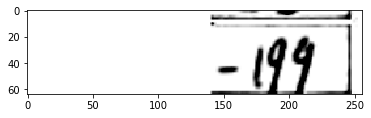

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


beams: [beam(19.9 , -0.0265), beam(19.7 , -4.4933), beam(18.9 , -5.1559), beam(19..9 , -5.7841), beam(19,.9 , -6.0588), beam(19.1 , -6.9055), beam(19.,9 , -7.2790), beam(12.9 , -7.7139)]
correct: ['18.9']


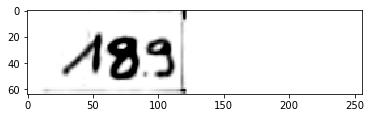

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


beams: [beam(104.33 , -0.0468), beam(10433 , -3.8992), beam(104.32 , -4.3425), beam(104.53 , -5.1616), beam(104.3 , -6.3335), beam(104533 , -6.7399), beam(1004.33 , -7.1558), beam(104.38 , -7.4996)]
correct: ['104.53']


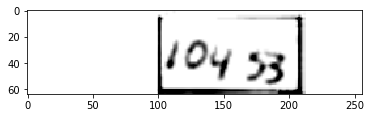

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


beams: [beam(10 , -0.0069), beam(70 , -5.0690), beam(0 , -7.8437), beam(40 , -9.4282), beam(90 , -10.5610), beam(710 , -10.7642), beam(100 , -12.6566), beam(100, -13.8314)]
correct: ['70']


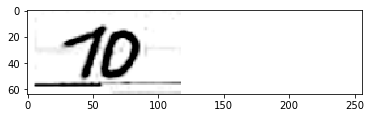

beams: [beam(74.93 , -0.3190), beam(74.73 , -1.3661), beam(774.93 , -5.1277), beam(74.23 , -6.0303), beam(774.73 , -6.1748), beam(74,93 , -6.9716), beam(7474.93 , -6.9847), beam(747.93 , -7.0227)]
correct: ['74.73']


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


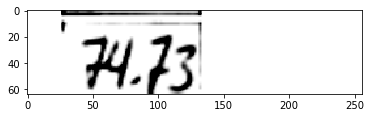

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


beams: [beam(17 , -0.2266), beam(77 , -1.6674), beam(7 , -4.8298), beam(97 , -5.5673), beam(19 , -6.9402), beam(-7 , -7.2536), beam(79 , -8.3811), beam(47 , -8.4606)]
correct: ['77']


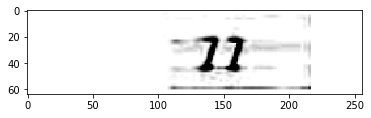

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


beams: [beam(9.6 , -0.2085), beam(96 , -1.7126), beam(9,6 , -5.7279), beam(.6 , -6.9715), beam(906 , -7.0944), beam(9.8 , -7.5649), beam(9.5 , -7.6149), beam(9.0 , -7.8101)]
correct: ['96']


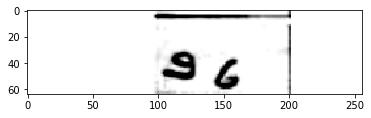

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


beams: [beam(10,200 , -0.6086), beam(10,800 , -1.4817), beam(10,900 , -1.6133), beam(10,300 , -3.6310), beam(10,700 , -6.6225), beam(10,2000 , -12.4295), beam(10,2000, -14.2760), beam(10,8000 , -14.8592)]
correct: ['10,900']


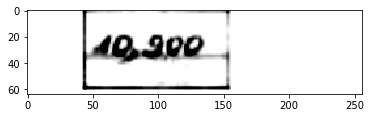

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


beams: [beam(97 , -0.0023), beam(99 , -6.8221), beam(7 , -7.1194), beam(27 , -8.8758), beam(87 , -8.8769), beam(77 , -9.7898), beam(91 , -10.3084), beam(9 , -11.0655)]
correct: ['88']


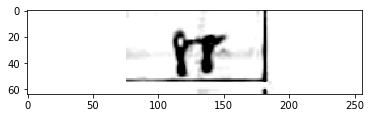

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


beams: [beam(137 , -1.2404), beam(13 , -1.4611), beam(134 , -1.7367), beam(139 , -1.8926), beam(132 , -2.4806), beam(131 , -2.7545), beam(13. , -6.0221), beam(133 , -7.1696)]
correct: ['130']


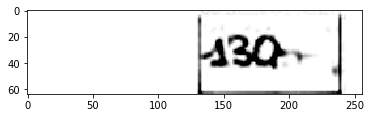

In [11]:
count = sum(tets() for j in range(100)) / 100

In [12]:
count

0.88